In [2]:
import warnings
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import seaborn as sns
import sympy
sympy.init_printing(use_unicode=True) 
from ipywidgets import interact
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style('darkgrid', rc=rc)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
#N1 is number of employees working remotely 
#N2 is number of employees working from offices
r1, K1, N1, alpha = sympy.symbols('r_1 K_1 N_1 alpha')
r2, K2, N2, beta = sympy.symbols('r_2 K_2 N_2 beta')

In [4]:
dN1_dt = r1 * N1 * (K1 - N1 -alpha * N2) / K1
dN2_dt = r2 * N2 * (K2 - N2 - beta * N1) / K2

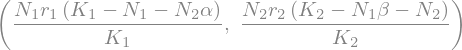

In [5]:
dN1_dt, dN2_dt

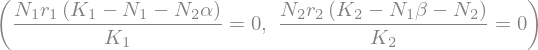

In [6]:
ss_N1 = sympy.Eq(dN1_dt, 0)
ss_N2 = sympy.Eq(dN2_dt, 0)
ss_N1, ss_N2

In [7]:
ss_N1_sol = sympy.solve(ss_N1, N1)
ss_N2_sol = sympy.solve(ss_N2, N2)

print('The steady state solution for both Remote work and Traditional work are:')
ss_N1_sol, ss_N2_sol

The steady state solution for both Remote work and Traditional work are:


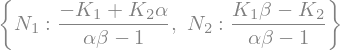

In [8]:
ss_dict = sympy.solve((sympy.Eq(N1, ss_N1_sol[1]), sympy.Eq(N2, ss_N2_sol[1])),
                      (N1, N2))
ss_dict

In [9]:
dN1_dt_num = sympy.utilities.lambdify([N1, N2, r1, K1, alpha], dN1_dt)
dN2_dt_num = sympy.utilities.lambdify([N2, N1, r2, K2, beta], dN2_dt)


def lotka_voltera_rhs(n1_n2, t, *p):
    '''
    Set up the right hand side (rhs) function for the system 
    (necessary step to feed sympy's odeint function).
    '''
    # unpack the variables
    n1, n2 = n1_n2
    
    # unpack the parameters
    r_1, k1, a, r_2, k2, b = p
    
    # Define derivatices rom lambdified functions
    n1dot = dN1_dt_num(n1, n2, r_1, k1, a)
    n2dot = dN2_dt_num(n2, n1, r_2, k2, b)

    return np.array([n1dot, n2dot])

In [10]:
# let's set the parameter values.
r_1, r_2 = [0.7, 0.4]
k1, k2 = [30000, 40000]
a, b = [0.2, 1.2]
args = (r_1, k1, a, r_2, k2, b)

# Initial employee size
n1_n2_0 = [1200, 20000]

# Time points we want to consider
t = np.linspace(0, 100, 1000)

# Now let's use odeint to solve the function
n1_n2 = odeint(lotka_voltera_rhs, n1_n2_0, t, args=args)

Text(0, 0.5, 'Employees')

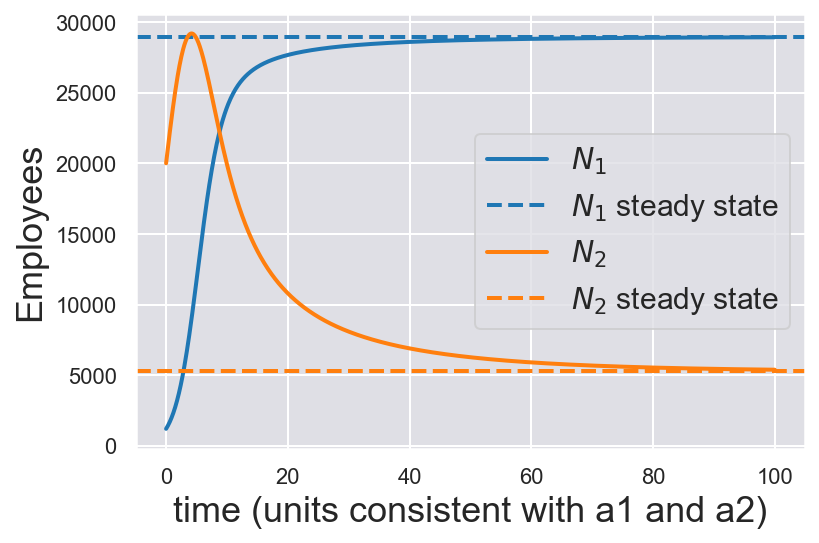

In [13]:
for i, N in enumerate([N1, N2]):
    plt.plot(t, n1_n2[:, i], label=r'${0:s}$'.format(sympy.latex(N)))
    plt.axhline(y=ss_dict[N].subs({K1: k1, K2: k2, alpha: a, beta: b}),
                linestyle='--', color=sns.color_palette()[i],
                label=r'${0:s}$ steady state'.format(sympy.latex(N)))

plt.legend(loc=0, fontsize=15)
plt.xlabel('time (units consistent with a1 and a2)')
plt.ylabel('Employees')